In [20]:
%load_ext autoreload
%autoreload 1

%aimport plots

import pandas as pd
import sklearn as skl
from bokeh.charts import HeatMap, output_file, show
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row

from ipywidgets import interact
#import numpy as np

output_notebook()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)
sns.set(style="white")

#sns.set(font="monospace")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

# Distance analysis

In [25]:
# sample-sample distance
dist = pd.read_csv("data/tmp_beta_div_o/euclidean_merged_47.txt", sep = "\t", index_col=0)\
    .ix[:100, :100]
    
# OTU shifts distance

mp = pd.read_csv("/d/metag/data/treatment_extract/mapping_file/mapping_file_collapsed.txt", sep="\t")
md = pd.read_csv("/d/metag/data/dat2tmp/ebi_metadata/ebi_metadata_full_information.tsv", sep="\t")

In [13]:
mp.columns

Index(['#SampleID', 'original-sample-ids', 'BarcodeSequence',
       'LinkerPrimerSequence', 'Treatment', 'project_id', 'words',
       'Description'],
      dtype='object')

In [14]:
print(dist.shape)
dist.describe()
dist.head()

(100, 100)


,ERS634946,ERS634907,ERS634975,ERS634934,ERS634908,ERS634933,ERS634973,ERS634930,ERS634969,ERS634968,...,ERS635057,ERS635050,ERS635051,ERS635052,ERS635053,ERS635115,ERS635114,ERS635117,ERS635116,ERS635111
ERS634946,0.000000,11125.246200,20017.695497,54864.614142,31143.001541,12514.690967,33068.514708,14114.546256,38168.465597,25791.281860,...,19589.549867,13580.842868,19556.038019,15954.620052,16646.830539,20463.132556,12162.383812,33849.851344,20845.855463,31887.584104
ERS634907,11125.246200,0.000000,22959.183435,56915.151691,33815.899870,17686.704017,35995.191901,18103.439038,38896.919197,27417.379835,...,21779.828856,16589.505598,21753.667093,18583.766518,19180.154066,22573.497226,15460.104818,35164.316985,22914.020752,33283.191178
ERS634975,20017.695497,22959.183435,0.000000,59096.673730,35288.887684,21912.651574,35755.396907,20706.911865,40836.876190,32012.516849,...,28805.871815,25116.083094,28783.347304,26472.961602,26894.682709,29418.646383,24405.302723,39901.842501,29675.269990,38264.311323
ERS634934,54864.614142,56915.151691,59096.673730,0.000000,60295.640274,54300.351831,59478.681761,53005.519382,58710.481833,40210.954838,...,59385.928106,57682.366855,59364.328734,58276.992115,58464.774095,59694.358469,57388.501732,65500.920474,59825.507445,64514.522466
ERS634908,31143.001541,33815.899870,35288.887684,60295.640274,0.000000,30117.101504,42782.423704,30666.816447,46754.550014,39976.992296,...,38252.019411,35560.092126,38234.109457,36529.550860,36831.151109,38718.625660,35068.345627,47178.948600,38911.804906,45805.231830


In [10]:
# no easy clustering in bokeh?

melted = dist.stack()
melted = melted.reset_index()
melted.columns = ["sample0", "sample1", "distance"]
#print(melted.head())

hm = HeatMap(melted, x = "sample0", y = "sample1", values = "distance", stat = None)
show(hm)

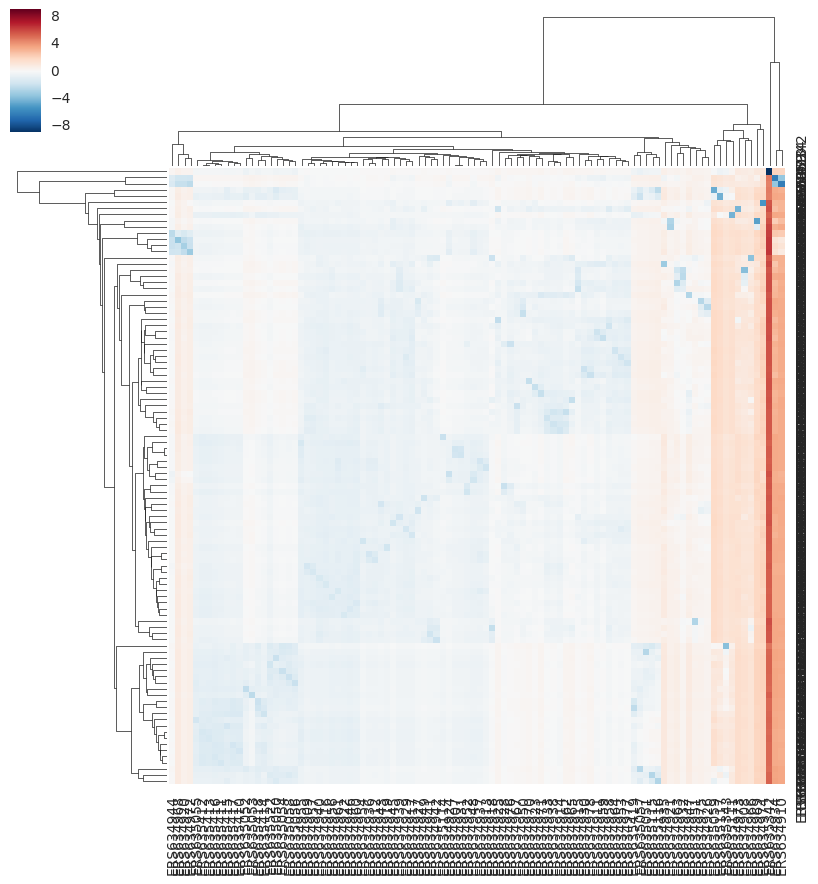

In [15]:
# Generate a mask for the upper triangle
mask = np.zeros_like(dist, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#p = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
#            square=True, xticklabels=5, yticklabels=5,
#            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
#p = sns.heatmap(corr, mask = mask)

#z_score=0 #normalize across rows
# standardize  standard_scale=1
p = sns.clustermap(dist, z_score = 0)


In [19]:
mp.columns

Index(['#SampleID', 'original-sample-ids', 'BarcodeSequence',
       'LinkerPrimerSequence', 'Treatment', 'project_id', 'words',
       'Description'],
      dtype='object')

In [126]:
%autoreload 1
dist_ml = plots.add_multilevel_col_names(dist, md).ix[:100, :100]
dist_ml.head()

project_id ERP009131                                                    \
sample_id  ERS634907 ERS634907 ERS634907 ERS634907 ERS634907 ERS634907   
ERS634907        0.0       0.0       0.0       0.0       0.0       0.0   
ERS634907        0.0       0.0       0.0       0.0       0.0       0.0   
ERS634907        0.0       0.0       0.0       0.0       0.0       0.0   
ERS634907        0.0       0.0       0.0       0.0       0.0       0.0   
ERS634907        0.0       0.0       0.0       0.0       0.0       0.0   

project_id                                              ...       \
sample_id  ERS634907 ERS634907 ERS634907 ERS634907      ...        
ERS634907        0.0       0.0       0.0       0.0      ...        
ERS634907        0.0       0.0       0.0       0.0      ...        
ERS634907        0.0       0.0       0.0       0.0      ...        
ERS634907        0.0       0.0       0.0       0.0      ...        
ERS634907        0.0       0.0       0.0       0.0      ...        

project_id                                                          \
sample_id      ERS634912     ERS634912     ERS634912     ERS634912   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   

project_id                                                          \
sample_id      ERS634912     ERS634912     ERS634912     ERS634912   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   
ERS634907   13418.635176  13418.635176  13418.635176  13418.635176   

project_id                              
sample_id      ERS634913     ERS634913  
ERS634907   13853.302097  13853.302097  
ERS634907   13853.302097  13853.302097  
ERS634907   13853.302097  13853.302097  
ERS634907   13853.302097  13853.302097  
ERS634907   13853.302097  13853.302097  

[5 rows x 100 columns]

In [127]:
dist_ml.columns.get_level_values(0)
dist_ml.shape

dist_ml = (dist_ml - dist_ml.mean()) / (dist_ml.max() - dist_ml.min())

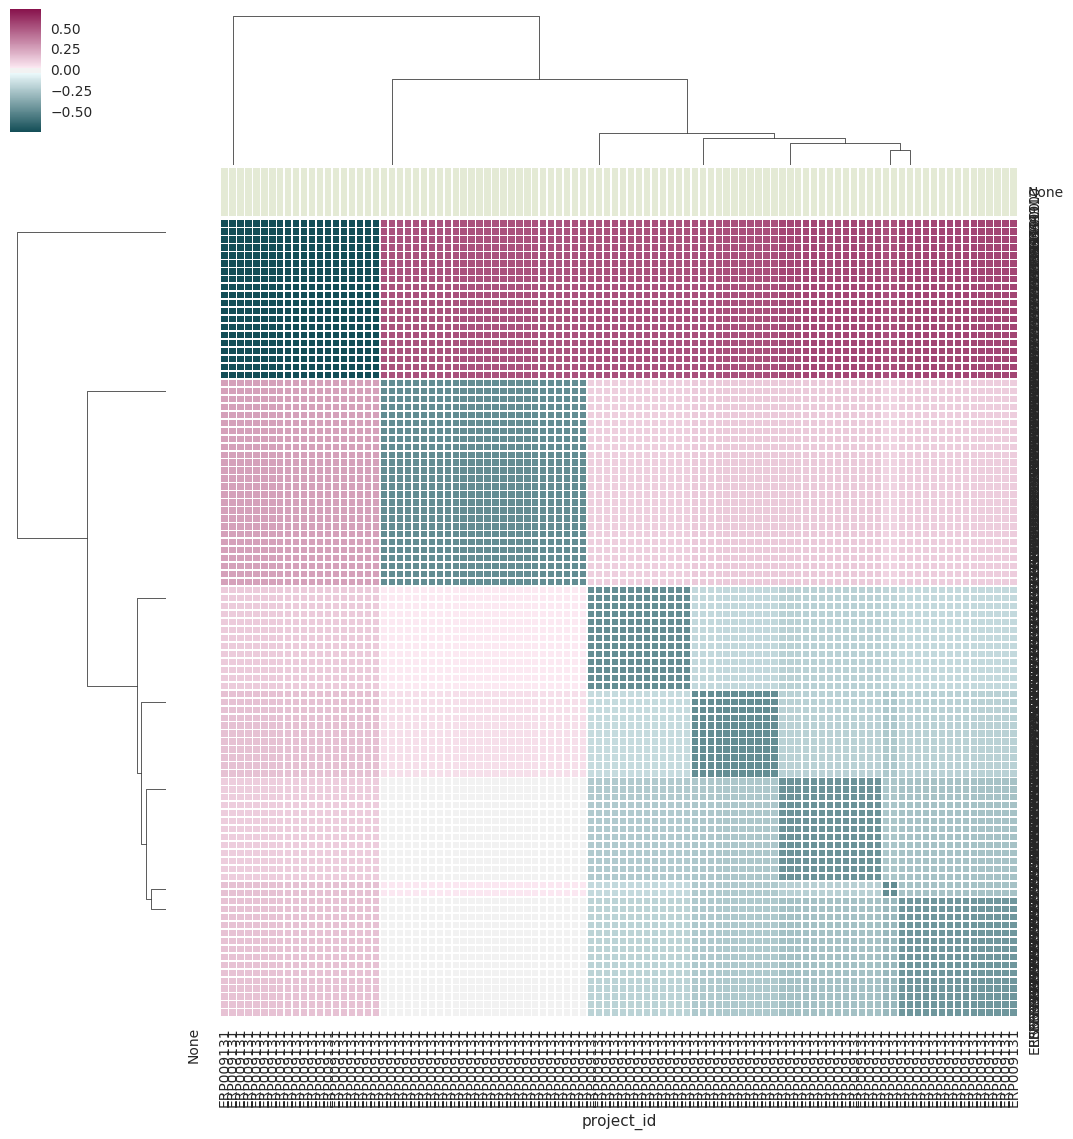

In [130]:
plots.distance_matrix_plots(dist_ml)

In [77]:
# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
df.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5               ...             16  \
node             1                     1               ...              3   
hemi            lh         rh         lh         rh    ...             rh   
0        47.461037  26.746613 -35.898861  -1.889181    ...       0.607904   
1        -1.210660 -19.012897  19.568010  15.902983    ...      57.495071   
2       -65.575806 -85.777428  19.247454  37.209419    ...      28.317369   
3       -41.800869 -58.610184  32.896915  11.199619    ...      71.439629   
4       -62.613335 -49.076508  18.396759   3.219077    ...      95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

In [101]:
print(df.index.name)

None


In [119]:
plots.distance_matrix_plots(df)

AttributeError: 'Index' object has no attribute 'droplevel'

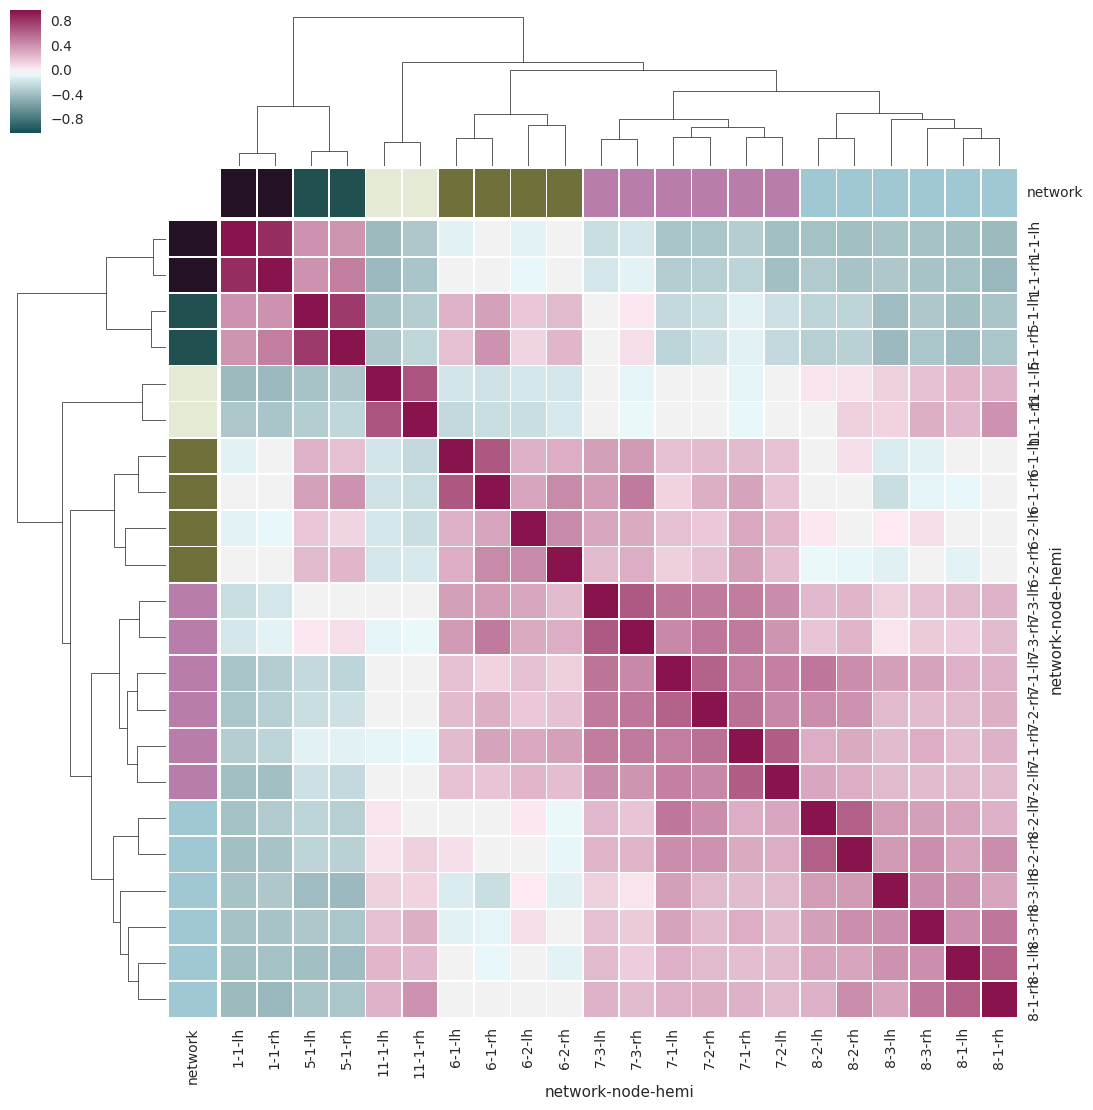

In [78]:
#"network" -> "treatment"
#"node" -> "project_id"
# heml -> sample id



# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 11]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

# Draw the full plot
sns.clustermap(df.corr(), row_colors=network_colors, linewidths=.5,
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)


In [80]:
network_colors

network  node  hemi
1        1     lh      [0.14250609166695374, 0.06696404307500585, 0.1...
               rh      [0.14250609166695374, 0.06696404307500585, 0.1...
5        1     lh      [0.1289377825588487, 0.3135457140541572, 0.319...
               rh      [0.1289377825588487, 0.3135457140541572, 0.319...
6        1     lh      [0.4404920782012465, 0.4447968107383926, 0.227...
               rh      [0.4404920782012465, 0.4447968107383926, 0.227...
         2     lh      [0.4404920782012465, 0.4447968107383926, 0.227...
               rh      [0.4404920782012465, 0.4447968107383926, 0.227...
7        1     lh      [0.7271290193717224, 0.4890231154163677, 0.670...
               rh      [0.7271290193717224, 0.4890231154163677, 0.670...
         2     lh      [0.7271290193717224, 0.4890231154163677, 0.670...
               rh      [0.7271290193717224, 0.4890231154163677, 0.670...
         3     lh      [0.7271290193717224, 0.4890231154163677, 0.670...
               rh      [0.72712

In [ ]:
# get project ID as multiindex

# try arbitrary colors now
#project_colors =

# Diff OTUs analysis

In [2]:
diff_otus = pd.read_csv("data/tmp_OTU-DIFF.tsv", sep="\t")

In [3]:
#biom_file = "data/SRP055567.biom"
#sp.call

In [5]:
diff_otus.describe()

,OTU,+samples in group 0,+samples in group 1,counts in group 0,counts in group 1,oddsRatio,lower,upper,fisherP,fisherAdjP,(Intercept),MGS_category1,scalingFactor,pvalues,adjPvalues
count,1.384800e+04,13848.000000,13848.000000,13848.000000,13848.000000,1.384800e+04,13848.000000,1.384800e+04,13848.000000,13848.0,13848.000000,13848.000000,1.384800e+04,1.384800e+04,13848.000000
mean,1.323477e+06,0.369728,0.553365,1.453856,1.553726,inf,0.034817,inf,0.853315,1.0,0.371515,0.140614,-1.373442e-01,8.099316e-01,0.998256
std,1.493381e+06,0.789775,0.903783,9.744117,6.604970,NaN,0.125609,NaN,0.298036,0.0,2.081158,0.939830,1.864977e+00,2.652271e-01,0.033991
min,1.287000e+03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.543270e+00,0.100000,1.0,-13.172345,-7.449547,-1.224649e+01,9.546999e-07,0.010437
25%,2.881700e+05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.900055e+01,1.000000,1.0,0.000000,0.000000,-9.999310e-17,6.594590e-01,1.000000
50%,6.672630e+05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,inf,1.000000,1.0,0.000000,0.000000,0.000000e+00,9.378002e-01,1.000000
75%,1.137593e+06,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,inf,1.000000,1.0,0.377033,0.444141,1.291598e-15,1.000000e+00,1.000000
max,4.484276e+06,3.000000,3.000000,463.000000,342.000000,inf,0.647975,inf,1.000000,1.0,15.207142,5.556888,1.408049e+01,1.000000e+00,1.000000


In [6]:
diff_otus.head()

,OTU,+samples in group 0,+samples in group 1,counts in group 0,counts in group 1,oddsRatio,lower,upper,fisherP,fisherAdjP,(Intercept),MGS_category1,scalingFactor,pvalues,adjPvalues,taxonomy
0,279072,3,0,320,0,inf,0.647975,inf,0.1,1,3.564756,-7.449547,3.046689,9.546999e-07,0.010437,k__Bacteria; p__Proteobacteria; c__Gammaproteo...
1,618672,3,0,463,0,inf,0.647975,inf,0.1,1,7.122441,-7.311742,0.148461,1.507324e-06,0.010437,k__Bacteria; p__Proteobacteria; c__Gammaproteo...
2,660326,3,0,313,0,inf,0.647975,inf,0.1,1,6.148020,-6.762381,0.481820,8.609858e-06,0.028526,k__Bacteria; p__Chloroflexi; c__Anaerolineae; ...
3,313062,3,0,336,0,inf,0.647975,inf,0.1,1,7.205020,-6.723856,-0.377358,9.683598e-06,0.028526,k__Bacteria; p__Proteobacteria; c__Gammaproteo...
4,346941,3,0,268,0,inf,0.647975,inf,0.1,1,5.555007,-6.703552,0.900759,1.029983e-05,0.028526,k__Bacteria; p__Proteobacteria; c__Gammaproteo...


In [ ]:
# get the data for merged diff otu files

# Notes

In [16]:
# (dict, OrderedDict, lists, arrays and DataFrames are valid inputs)
data = {'fruit': ['apples']*3 + ['bananas']*3 + ['pears']*3,
        'fruit_count': [4, 5, 8, 1, 2, 4, 6, 5, 4],
        'sample': [1, 2, 3]*3}

print(pd.DataFrame(data))

hm = HeatMap(data, x='fruit', y='sample', values='fruit_count',
             title='Fruits', stat=None)
show(hm)


     fruit  fruit_count  sample
0   apples            4       1
1   apples            5       2
2   apples            8       3
3  bananas            1       1
4  bananas            2       2
5  bananas            4       3
6    pears            6       1
7    pears            5       2
8    pears            4       3


In [7]:
data

{'fruit': ['apples',
  'apples',
  'apples',
  'bananas',
  'bananas',
  'bananas',
  'pears',
  'pears',
  'pears'],
 'fruit_count': [4, 5, 8, 1, 2, 4, 6, 5, 4],
 'sample': [1, 2, 3, 1, 2, 3, 1, 2, 3]}

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(font="monospace")

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

# Draw the full plot
sns.clustermap(df.corr(), row_colors=network_colors, linewidths=.5,
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)
